## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns=['medv']).copy()
y = boston[['medv']]

In [7]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [8]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [12]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=2 é: 0,74
O MSE da árvore com profundidade=8 é: 0,98


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [13]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.53419576e-14, 1.54798762e-05, 6.19195046e-05,
        1.39318885e-04, 3.86996904e-04, 1.25386997e-03, 1.54798762e-03,
        1.54798762e-03, 1.87306502e-03, 1.99793602e-03, 2.50773994e-03,
        2.61609907e-03, 3.48297214e-03, 3.61197110e-03, 4.04540764e-03,
        4.47368421e-03, 5.69917441e-03, 6.19453044e-03, 6.26315789e-03,
        7.47456877e-03, 7.84829721e-03, 8.29279080e-03, 8.91640867e-03,
        1.03242174e-02, 1.11764706e-02, 1.31368863e-02, 1.56088751e-02,
        2.12139795e-02, 2.31648607e-02, 2.38018576e-02, 2.57769424e-02,
        2.60113519e-02, 2.63183695e-02, 2.75550396e-02, 2.85716743e-02,
        2.95876724e-02, 2.99488695e-02, 3.18443167e-02, 3.34378225e-02,
        3.94267755e-02, 4.45820433e-02, 4.50784314e-02, 5.20575726e-02,
        5.23685685e-02, 5.66602167e-02, 5.68885449e-02, 5.89494324e-02,
        5.96078431e-02, 6.50371589e-02, 7.45206670e-02, 8.32654663e-02,
        8.76341120e-02, 9.11867905e-02, 1.02585139

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [15]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities



In [16]:
    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
        clf.fit(X_train, y_train)
        clfs.append(clf)

In [17]:
clfs

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=2.5341957634539795e-14, random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.5479876160624662e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=6.191950464395053e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00013931888544914167, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0003869969040247678, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0012538699690391073, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0015479876160988952, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0015479876160993352, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0018730650154799324, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00199793601651211, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0025077399380838464, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0026160990712071628, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00348297213622291, random_state=0),
 DecisionTre

### 4. Para cada árvore na lista, calcule o MSE da árvore.

Text(0, 0.5, 'Profundidade da árvore')

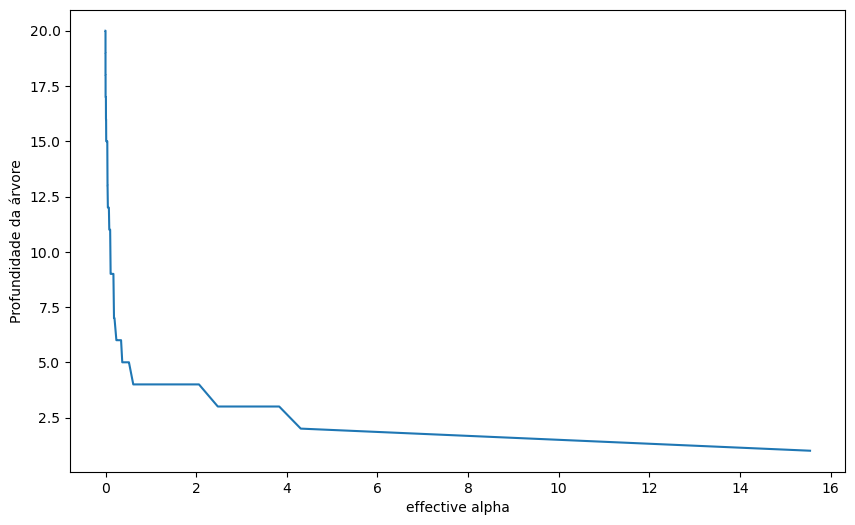

In [18]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

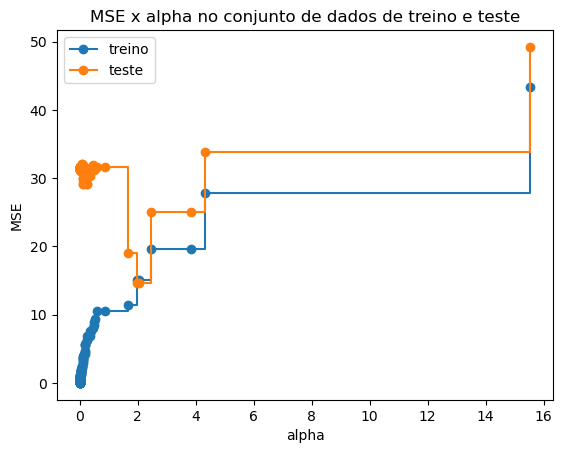

In [24]:
from sklearn.metrics import mean_squared_error
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha no conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker="o", label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker="o", label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [25]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=.01)
arvore_final.fit(X_train, y_train)

print(f"Profundidade: {arvore_final.tree_.max_depth}")
print(f"R-quadrado na base de testes: {arvore_final.score(X_test, y_test):.2f}")
print(f"MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test )):.2f}")

Profundidade: 16
R-quadrado na base de testes: 0.57
MSE na base de testes: 31.27


### 7. Visualize esta árvore.

<Axes: xlabel='n_minimo', ylabel='profundidade'>

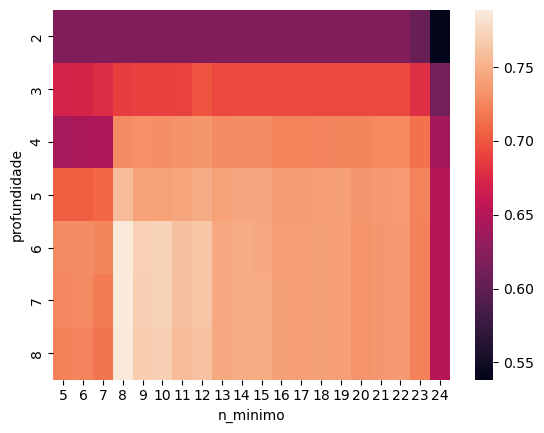

In [33]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(5, 25):
        arvore_final = DecisionTreeRegressor(max_depth = i, min_samples_leaf=j)
        arvore_final.fit(X_train, y_train)
        mse1 = arvore_final.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)

df_mse = pd.DataFrame({"mses":mses, "profundidade":ind_i, "n_minimo":ind_j})
sns.heatmap(df_mse.pivot(index="profundidade", columns="n_minimo", values="mses"))
        